# EECS16A Discussion 1C

## Social Media

(a) What is the corresponding transition matrix?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T = np.array([[0.4, 0.2, 0.0, 0.0],
              [0.3, 0.6, 0.0, 0.0],
              [0.0, 0.0, 0.6, 0.0],
              [0.3, 0.2, 0.4, 1.0]])

(b) There are 150 of you in the class. Suppose on a given Friday evening (the day when HW is due), there are 70 EE16A students on Facebook, 45 on YouTube, 20 on Instagram, and 15 actually doing work. In the next timestep, how many people will be doing each activity? In other words, after you apply the matrix once to reach the next timestep, what is the state vector?

In [2]:
vi = np.array([70,45,20,15])
vo = np.dot(T,vi)

print(vo)

[37. 48. 12. 53.]


(d) You want to predict how many students will be on each website n timesteps in the future. How would you formulate that mathematically? Without working it out, can you predict roughly how many stu- dents will be in each state 1000 timesteps in the future?

In [3]:
T1000 = np.linalg.matrix_power(T,1000)

print(T1000)

[[8.18376333e-118 9.94532196e-118 0.00000000e+000 0.00000000e+000]
 [1.49179829e-117 1.81290853e-117 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 1.41661026e-222 0.00000000e+000]
 [1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000]]


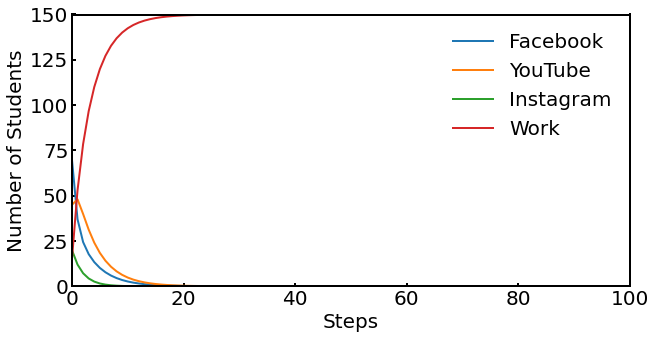

In [4]:
# Compute the state step-by-step

steps = np.arange(0,101,1)
vprogress = np.zeros((len(steps),len(vi)))

for i in range(len(steps)):
    vprogress[i,:] = np.dot(np.linalg.matrix_power(T,i),vi)
    
# Plot the progress

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, xlim = [steps[0], steps[-1]], ylim = [0, 150])

for i in range(len(vi)):
    ax.plot(steps,vprogress[:,i], linewidth=2)
    
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Number of Students', fontsize=20)    
ax.tick_params(labelsize=20,width=2,direction='in')   
ax.legend(['Facebook','YouTube','Instagram','Work'],frameon=False, fontsize=20)

(e) Challenging Practice Problem: Suppose, instead of having ‘Work’ as an explicit state, we assume that any student not on Facebook/Youtube/Instagram is working. Work is like the “void,” and if a student is “leaked” from any of the other states, we assume s/he has gone to work and will never come back. How would you reformulate this problem? Redraw the figure and rewrite the appropriate transition matrix. What are the major differences between this problem and the previous one?

In [5]:
A_leak = np.array([[0.4, 0.2, 0.0],
                  [0.3, 0.6, 0.0],
                  [0.0, 0.0, 0.6]])

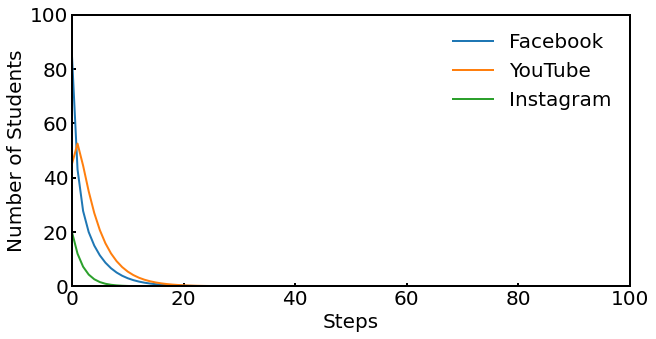

In [6]:
vi_leak = np.array([85,45,20])
vprogress_leak = np.zeros((len(steps),len(vi_leak)))

for i in range(len(steps)):
    vprogress_leak[i,:] = np.dot(np.linalg.matrix_power(A_leak,i),vi_leak)
    
# Plot the progress

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, xlim = [steps[0], steps[-1]], ylim = [0, 100])

for i in range(len(vi_leak)):
    ax.plot(steps,vprogress_leak[:,i], linewidth=2)
    
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Number of Students', fontsize=20)    
ax.tick_params(labelsize=20,width=2,direction='in')   
ax.legend(['Facebook','YouTube','Instagram'],frameon=False, fontsize=20)